# Análisis de datos de AFP Modelo
En este notebook se analiza el comportamiento de los fondos de pensiones de la AFP Modelo, para ello se compara el comportamiento de los fondos (A, B, C, D, y E) y se compara a través del último mes.

Primero se importan los datos desde la página de la AFP utilizando **`urllib3`**
<!-- Sería interesante encontrar una base de datos más completa y con mayor proyecciones (modelo funciona desde ~2009) -->

In [1]:
import urllib3
http = urllib3.PoolManager()
html = http.request('GET', 'https://www.afpmodelo.cl/AFP/Indicadores/Valor-Cuota.aspx')
#r.data

d:\program files\python36\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Se lee utilizando la librería **`BeautifulSoup`** para extraer los datos en HTML, es necesario formatear los datos, ya que vienen como strings.

In [20]:
from bs4 import BeautifulSoup
from datetime import datetime

soup = BeautifulSoup(html.data, 'html.parser')
#print(soup.prettify())

def currency_format(string_currency): # '$ 40.850,20' -> 40850.2
    return float(string_currency.replace('$','').replace('.','').replace(',','.').strip())

fecha = []
# A,B,C,D,E = [],[],[],[],[]
nombres = 'ABCDE'
fondos = [[],[],[],[],[]]

table = soup.find("table")
for row in table.findAll("tr"):
    cells = row.findAll("td")
    if len(cells) == 6:
        fecha.insert(0, datetime.strptime(cells[0].find(text=True),'%d-%m-%Y') )
        for fondo, cell in zip(fondos, range(1, 6)):
            fondo.insert(0, currency_format(cells[cell].find(text=True)))

Es posible visualizar la evolución de los fondos simplemente ploteando en función de fecha

In [31]:
import matplotlib.pyplot as plt
# % matplotlib inline
def plot(fondos):
    for fondo in fondos:
        plt.plot(fecha, fondo)
    plt.legend([nombre for nombre in nombres])

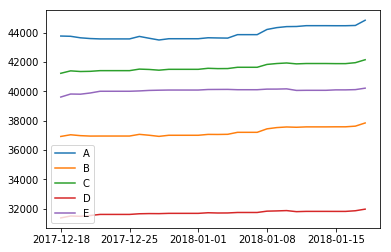

In [32]:
plot(fondos)

Para generar una idea de la relación entre los distintos fondos, se puede generar un histograma que compara los datos, esto es posible gracias a las librerías **`numpy`** y **`pandas`** que ayudan a organizar la información.

In [23]:
import numpy as np
import pandas as pd
def scatter(fondos):
    fondos = np.array(fondos).transpose()

    df = pd.DataFrame(fondos, index=fecha, columns=list('ABCDE'))
    #print(df)

    pd.plotting.scatter_matrix(df);

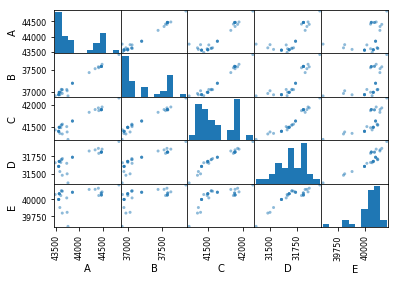

In [24]:
scatter(fondos)

Se puede observar una clara relación entre los fondos A y B, y entre los fondos B y C, lo que hace pensar que las rentabilidades de dichos fondos (más riesgosos) están dadas por factores comunes y su diferencia radica sólo en el porcentaje de inversión realizado, y no en el tipo de inversión.

In [25]:
def dif(array):
    prev = array[0]
    result = []
    for item in array:
        result.append(item - prev)
        prev = item
    return result

In [26]:
fondos_diferenciados = [dif(fondo) for fondo in fondos]

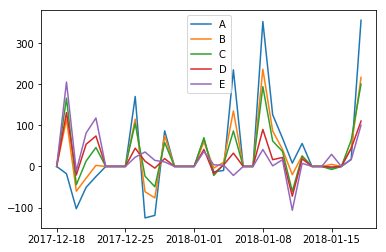

In [33]:
plot(fondos_diferenciados)

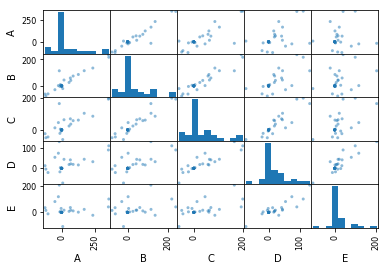

In [28]:
scatter(fondos_diferenciados)